In [17]:
import sympy as sp
import numpy as np
from sympy import *
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Задача 1** (14 баллов)

Найдите экстремумы функции:

$$
f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8 .
$$

Распишите подробное решение.

In [19]:
# Определяем переменные
x, y, z = sp.symbols('x y z')

# Определяем функцию
f = 2*x**3 + 2*x*y + 2*x*z + y**2 + z**2 + 2*y - 8

# Находим производные первого порядка
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
df_dz = sp.diff(f, z)

# Находим критические точки, решая систему уравнений (уравнения производных приравниваем к нулю)
critical_points = sp.solve((df_dx, df_dy, df_dz), (x, y, z))

# Выводим критические точки
print("Критические точки:", critical_points)

# Находим производные второго порядка для составления матрицы Гессе
second_derivative_xx = sp.diff(df_dx, x)
second_derivative_xy = sp.diff(df_dx, y)
second_derivative_xz = sp.diff(df_dx, z)
second_derivative_yx = sp.diff(df_dy, x)
second_derivative_yy = sp.diff(df_dy, y)
second_derivative_yz = sp.diff(df_dy, z)
second_derivative_zx = sp.diff(df_dz, x)
second_derivative_zy = sp.diff(df_dz, y)
second_derivative_zz = sp.diff(df_dz, z)
print(f"\nПроизводные второго порядка: xx = {second_derivative_xx}")
print(f"Производные второго порядка: xy = {second_derivative_xy}")
print(f"Производные второго порядка: xz = {second_derivative_xz}")
print(f"Производные второго порядка: yx = {second_derivative_yx}")
print(f"Производные второго порядка: yy = {second_derivative_yy}")
print(f"Производные второго порядка: yz = {second_derivative_yz}")
print(f"Производные второго порядка: zx = {second_derivative_zx}")
print(f"Производные второго порядка: zy = {second_derivative_zy}")
print(f"Производные второго порядка: zz = {second_derivative_zz}")

Критические точки: [(-1/3, -2/3, 1/3), (1, -2, -1)]

Производные второго порядка: xx = 12*x
Производные второго порядка: xy = 2
Производные второго порядка: xz = 2
Производные второго порядка: yx = 2
Производные второго порядка: yy = 2
Производные второго порядка: yz = 0
Производные второго порядка: zx = 2
Производные второго порядка: zy = 0
Производные второго порядка: zz = 2


In [21]:
# Матрица Гессе, определитель, и собственные значения для первой точки (−1/3,−2/3,1/3)
x1 = -1/3
Hesse = np.array([[12 * x1, 2, 2],
              [2, 2, 0],
              [2, 0, 2]])
det_Hesse = np.linalg.det(Hesse)
main_values = np.linalg.eigvals(Hesse)
print(f"\nМатрица Гессе для x1 = {x1}:\n{Hesse}")
print(f"Определитель матрицы Гессе:", det_Hesse)
print(f"Собственные значения матрицы Гессе:", main_values)

# Матрица Гессе, определитель, и собственные значения для второй точки (1,−2,-1)
x2 = 1
Hesse2 = np.array([[12 * x2, 2, 2],
              [2, 2, 0],
              [2, 0, 2]])
det_Hesse2 = np.linalg.det(Hesse2)
main_values2 = np.linalg.eigvals(Hesse2)
print(f"\nМатрица Гессе для x2 = {x2}:\n{Hesse2}")
print(f"Определитель матрицы Гессе:", det_Hesse2)
print(f"Собственные значения матрицы Гессе:", main_values2)

# Вывод
if main_values[0]<0 or main_values[1]<0 or main_values[2]<0:     
    print("\nВывод для точки (−1/3,−2/3,1/3): одно из собственных значений матрицы отрицательно, матрица Гессе отрицательно определена, следовательно данная критическая точка является седловой и не является экстремумом.")
elif main_values[0]<0 and main_values[1]<0 and main_values[2]<0:
    print("\nВывод для точки (−1/3,−2/3,1/3): все собственные значения матрицы отрицательные, матрица Гессе отрицательно определена, следовательно данная критическая точка является точкой экстремума (локального максимума).")
else:
    print("\nВывод для точки (−1/3,−2/3,1/3): все собственные значения матрицы положительны, матрица Гессе положительно определена, следовательно данная критическая точка является точкой экстремума (локального минимума).")

if main_values2[0]<0 or main_values2[1]<0 or main_values2[2]<0:     
    print("\nВывод для точки (1,−2,-1): одно из собственных значений матрицы отрицательно, матрица Гессе отрицательно определена, следовательно данная критическая точка является седловой и не является экстремумом.")
elif main_values2[0]<0 and main_values2[1]<0 and main_values2[2]<0:
    print("\nВывод для точки (1,−2,-1): все собственные значения матрицы отрицательные, матрица Гессе отрицательно определена, следовательно данная критическая точка является точкой экстремума (локального максимума).")
else:
    print("\nВывод для точки (1,−2,-1): все собственные значения матрицы положительны, матрица Гессе положительно определена, следовательно данная критическая точка является точкой экстремума (локального минимума).")


Матрица Гессе для x1 = -0.3333333333333333:
[[-4.  2.  2.]
 [ 2.  2.  0.]
 [ 2.  0.  2.]]
Определитель матрицы Гессе: -32.0
Собственные значения матрицы Гессе: [-5.12310563  3.12310563  2.        ]

Матрица Гессе для x2 = 1:
[[12  2  2]
 [ 2  2  0]
 [ 2  0  2]]
Определитель матрицы Гессе: 32.000000000000014
Собственные значения матрицы Гессе: [12.74456265  1.25543735  2.        ]

Вывод для точки (−1/3,−2/3,1/3): одно из собственных значений матрицы отрицательно, матрица Гессе отрицательно определена, следовательно данная критическая точка является седловой и не является экстремумом.

Вывод для точки (1,−2,-1): все собственные значения матрицы положительны, матрица Гессе положительно определена, следовательно данная критическая точка является точкой экстремума (локального минимума).


Ответ: Экстремум функции (точка локального минимума) - (1,-2,-1).

**Задача 2** (25 баллов)

Найдите условные экстремумы функции:

$$
f(x, y)=4 x+8 y, y^2-2 x y+5=0
$$

Вычислите результат самостоятельно (вручную) и с помощью Python. Сравните результаты.

Целевая функция: g = 4x + 8y

Функция ограничений: q = y^2 - 2xy + 5

Функция Лагранжа L(x,y,λ) = 4x + 8y + λ(y² - 2xy + 5)

1)Вычисляем производные первого порядка для Функции Лагранжа и приравниваем их к нулю:

∂L/∂x = 4 - 2λy = 0

∂L/∂y = 8 + 2λy - 2λx = 0 

∂L/∂λ = y² - 2xy + 5 = 0

Решаем систему получившихся уравнений.

2)Из первого уравнения выражаем у:

4 - 2λy = 0

λy = 2

y = 2/λ

3)Из второго уравнения выражаем х и подставляем значение у, выраженное из первого уравнения:

8 + 2λy - 2λx = 0

8 + 2λ(2/λ) - 2λx = 0

8 + 4 - 2λx = 0

2λx = 12

х = 6/λ

4)В третье уравнение подставляем получившиеся значения х и у и находим λ:

(2/λ)² - 2(6/λ)(2/λ) + 5 = 0

4/λ² - 24/λ² + 5 = 0

-20/λ² + 5 = 0

-20 + 5λ² = 0

λ² = 4

λ = +-2

5)Вычисляем координаты точек экстремума, подставив получившееся значение λ в уравнения для х и у:

При λ = 2:

x = 6/2 = 3

y = 2/2 = 1

В итоге первая точка экстремума А = (3, 1).

При λ = -2:

x = 6/(-2) = -3

y = 2/(-2) = -1

В итоге вторая точка экстремума В = (-3, -1).

6)Мы нашли точки А и В. Подставим их значение в целевую функцию:

Если А = (3, 1):

g = 4 * 3 + 8 * 1 = 20

Если В = (-3, -1):

g = 4 * (-3) + 8 * (-1) = -20

Ответ: Условные экстремумы функции - максимум в точке А = (3, 1) со значением 20, минимум - в точке В= (-3, -1) со значением -20.

In [23]:
x,y,w=sp.symbols(' x y w' )
g = 4*x+8*y
print('Целевая функция для аргументов x и y :\n f = ', g)
q = y**2-2*x*y+5
print('Функция ограничений: ', q,'= 0')
f = 4*x+8*y + w*(y**2-2*x*y+5)
print('Функция Лагранжа :\n ',f)
fx = f.diff(x)
print('df/dx =',fx,'= 0')
fy = f.diff(y)
print('df/dy =',fy,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fx,fy,fw],x,y,w)
print(f"Ответ: = {sols}")

# Для определения точек максимума и минимума найдём значения целевой функции в найденных точках
g1 = 4*(-3)+8*(-1)
print('\nЗначение целевой функции в точке (-3, -1) = ', g1)
g2 = 4*3+8*1
print('Значение целевой функции в точке (3, 1) = ', g2)

Целевая функция для аргументов x и y :
 f =  4*x + 8*y
Функция ограничений:  -2*x*y + y**2 + 5 = 0
Функция Лагранжа :
  w*(-2*x*y + y**2 + 5) + 4*x + 8*y
df/dx = -2*w*y + 4 = 0
df/dy = w*(-2*x + 2*y) + 8 = 0
df/dw = -2*x*y + y**2 + 5 = 0
Ответ: = [(-3, -1, -2), (3, 1, 2)]

Значение целевой функции в точке (-3, -1) =  -20
Значение целевой функции в точке (3, 1) =  20


Ответ: точка максимума: (3, 1), значение: 20; точка минимума: (-3, -1), значение: -20

Вывод: результаты вычислений вручную и с помощью Python получились идентичными.

**Задача 3** (30 баллов)

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

**Решите задачу линейной регрессии, реализовав градиентный спуск самостоятельно, не используя готовое решение из какой-либо библиотеки.**

In [25]:
df = pd.read_csv('Student_Performance.csv') 
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Типы данных в DataFrame:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


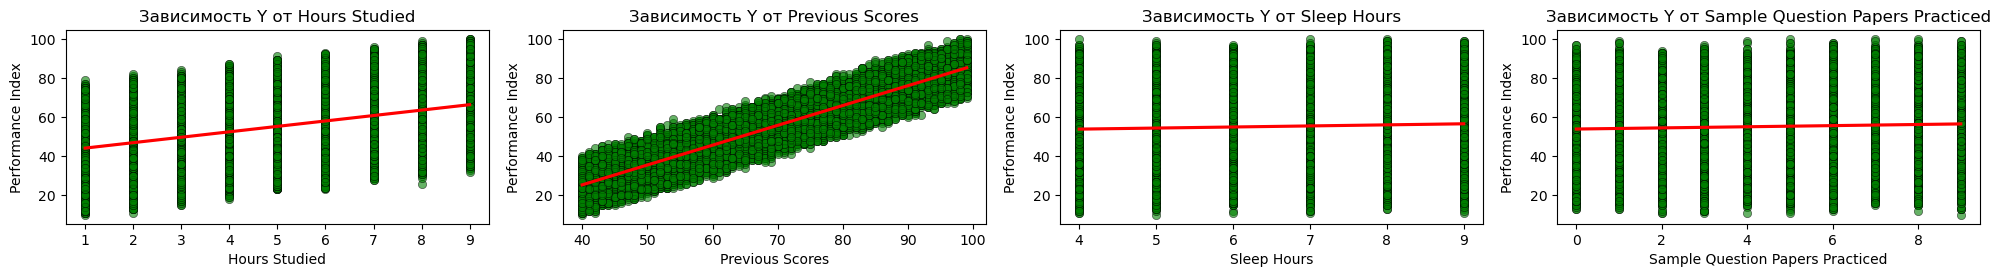


Коэффициенты (градиентный спуск):
[55.21799391  7.38686697 17.66226924  0.80778342  0.55992715]
MAPE: 3.50%
R²: 0.99

Коэффициенты (sklearn):
[55.2248      0.          7.38804001 17.66456627  0.80775509  0.55967342]
MAPE (sklearn): 3.50%
R² (sklearn): 0.99


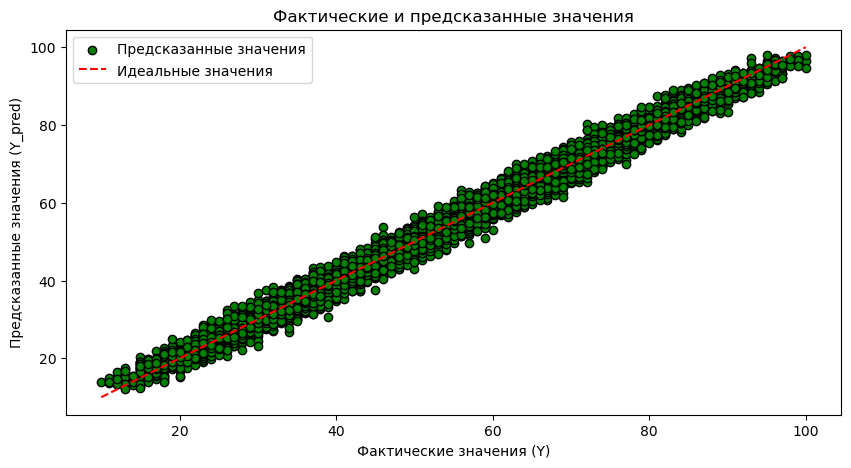

In [27]:
# проверка типов данных
print("Типы данных в DataFrame:")
print(df.dtypes)

# Проверка на NaN и удаление строк с NaN
df = df.dropna()

# Извлечение независимых переменных и целевой переменной (пропускаем столбец Extracurricular Activities, там нет числовых значений)
X0 = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = df['Performance Index'].values.reshape(-1, 1)

# Построение диаграмм зависимости y от независимых переменных для проверки линейности модели
plt.figure(figsize=(20, 10))
independent_vars = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
for i, var in enumerate(independent_vars):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(x=df[var], y=df['Performance Index'], color='green', edgecolor='black', alpha=0.6)  # Диаграмма рассеяния
    sns.regplot(x=df[var], y=df['Performance Index'], scatter=False, color='red')  # Линия регрессии
    plt.title(f'Зависимость Y от {var}')
    plt.xlabel(var)
    plt.ylabel('Performance Index')
plt.tight_layout()
plt.show()

# Применяем стандартизацию, так как на графике видно, что Previous Scores отличается от других данных
scaler = StandardScaler()
X = scaler.fit_transform(X0)
# Нормализация признаков
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / (X_std + 1e-8)  # Добавление небольшого значения для предотвращения деления на ноль
n = X_normalized.shape[0]
X_normalized = np.hstack((np.ones((n, 1)), X_normalized))  # Добавление столбца единиц

# Функция ошибок (среднеквадратичная ошибка)
def cost_function(X, y, theta):
    y_pred = np.dot(X, theta)
    return np.mean((y_pred - y) ** 2)

# Градиентный спуск
def gradient_descent(X, y, theta, alpha, iterations):
    costs = []
    for _ in range(iterations):
        y_pred = np.dot(X, theta)
        errors = y_pred - y
        gradient = (1 / y.shape[0]) * np.dot(X.T, errors)
        theta -= alpha * gradient
        costs.append(cost_function(X, y, theta))
    return theta, costs

# Инициализация параметров
theta_initial = np.zeros((X_normalized.shape[1], 1))
alpha = 0.0003  # Скорость обучения
iterations = 30000 

# Обучение модели
theta_optimal, costs = gradient_descent(X_normalized, y, theta_initial, alpha, iterations)

# Предсказание
y_pred = np.dot(X_normalized, theta_optimal)

# Функция для расчета MAPE
def MAPE_func(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100
mape_opt = MAPE_func(y, y_pred)
r2_opt = r2_score(y, y_pred)

# Библиотечное решение (sklearn)
model = LinearRegression()
model.fit(X_normalized, y)
y_pred_sklearn = model.predict(X_normalized)
r2_sklearn = r2_score(y, y_pred_sklearn)
MAPE_sklearn = MAPE_func(y, y_pred_sklearn)

# Сравнение значений двух реализаций
print("\nКоэффициенты (градиентный спуск):")
print(theta_optimal.flatten())
print(f"MAPE: {mape_opt:.2f}%")
print(f"R²: {r2_opt:.2f}")
print("\nКоэффициенты (sklearn):")
print(np.hstack((model.intercept_, model.coef_[0])))
print(f"MAPE (sklearn): {MAPE_sklearn:.2f}%")
print(f"R² (sklearn): {r2_sklearn:.2f}")

# График сравнения Y и Y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred, color='green', edgecolor='black', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальные значения')
plt.title('Фактические и предсказанные значения')
plt.xlabel('Фактические значения (Y)')
plt.ylabel('Предсказанные значения (Y_pred)')
plt.legend()
plt.show()

Исходя из полученных коэффициентов можно сделать вывод, что наибольшее влияние на успеваемость оказывают баллы за предыдыущие экзамены (увеличение на 1 приводит к увеличению успеваемости на 17.66) и часы учебы (увеличение на 1 приводит к увеличению успеваемости на 7.39). Наименьшее влияние у количества пробных экзаменационных работ. Средняя абсолютная процентная ошибка МАРЕ составляет 3,5%, что меньше 5%. Это свидетельствует о хорошей точности модели. Коэффициент детерминации составляет 99%, что означает, что 99% результатов модели объясняется независимыми переменными, что тоже является хорошим результатом.

Библиотечное решение градиентного спуска показало аналогичные результаты коэффициентов и точности модели.